# Projet numérique de Mathématiques - Calcul Différentiel 2

## Introduction

On souhaite tracer les lignes de niveau d'une fonction à deux variables et à valeur réelle. C'est à dire trouver une partie significative des points de l'ensemble suivant:
$\{(x,y) \in \mathbf{R}^2 | f(x,y) = c\} où c \in \mathbf{R}$

## Contour simple

### Amorce

Ici, on se place sur l'arrête gauche du cadre de tracé. On fixe alors $x = 0$ et on peut définir: $\begin{array}{ccccc}
g & : & \mathbf{R} & \to & \mathbf{R} \\
 & & y & \mapsto & f(0, y) \\
\end{array}$

On sait que g est dérivable et de dérivée continue d'après les propriétés de différentiabilité de f. Ainsi, en utilisant le Théorème des valeurs intermédiaires, on a directement que si $g(0) \leq c \leq g(1)$ ou bien $g(1) \leq c \leq g(0)$, alors il existe $t \in [0,1]$ tel que $g(t) = c$

### Module 

Voici les modules utilisés dans le script:

In [1]:
import autograd
from autograd import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Fonction find_seed

On utilise une méthode de dichotomie. En effet, on compare f évaluée en un point milieu par rapport à c pour continuer à valider la condition précédente. Et ainsi de suite jusqu'à arriver à un intervalle de taille suffisemment petite.

In [3]:
def find_seed(g,c=0,eps=2**(-26)):
    '''Propose un t qui convient si c'est possible'''
    a=0
    b=1
    if (g(a)-c)*(g(b)-c)>0:    #Si la condition précédente n'est pas vérifée
        return None
    while (b-a)>eps:    #Méthode dichotomique
        t=(b+a)/2
        if (g(a)-c)*(g(t)-c)<=0:
            b=t
        else:
            a=t
    return t

### Propagation: simple_contour

Tout d'abord, on se rapporte à des carrés de côtés unitaires et on suppose que la courbe entre par le côté gauche, de manière à trouver un premier point à tracer grâce à find_seed. Ensuite, on calcule le gradient de la fonction à l'aide ce qui suit:

In [9]:
def gradient(f,x,y):
    g=autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]

On en déduit un vecteur directeur de la droite tangente à la courbe bien orienté (grâce au deuxième if). On norme ce vecteur et on le multiplie par la distance delta maximale demandée.

In [5]:
def simple_contour(f,c=0,delta=0.01):
    x=np.array([])
    y=np.array([])
    eps=2**(-26)
    gamma = delta / math.sqrt(2)
    def g(x):
        return (f(0,x))
    if find_seed(g,c)==None:
        return x,y
    y = np.append(y, np.array([find_seed(g,c)]))

    x = np.append(x, np.array([0]))

    grad=gradient(f,x[-1],y[-1])
    tang=[-grad[1],grad[0]]
    print(tang)
    if tang[0]<0:
        tang=[grad[1],-grad[0]]
        while x[-1] <= 1 and y[-1] <= 1 and x[-1] >= 0 and y[-1] >= 0:
            grad=gradient(f,x[-1],y[-1])
            tang=[grad[1],-grad[0]]
            norme=math.sqrt(tang[0]**2+tang[1]**2)
            x = np.append(x, np.array(x[-1]+(delta*tang[0])/(norme)))
            y = np.append(y, np.array(y[-1]+(delta*tang[1])/(norme)))
    else:
        tang=[-grad[1],grad[0]]
        while x[-1] <= (1) and y[-1] <= (1) and x[-1] >= 0 and y[-1] >= 0:
            grad=gradient(f,x[-1],y[-1])
            tang=[-grad[1],grad[0]]
            norme=math.sqrt(tang[0]**2+tang[1]**2)
            x = np.append(x, np.array(x[-1]+(delta*tang[0])/(norme)))
            y = np.append(y, np.array(y[-1]+(delta*tang[1])/(norme)))
    return x,y

#### Premier tracé: la fonction du sujet

In [11]:
def f(x,y):
    return 2*( np.exp(-x**2-y**2)- np.exp(-(x-1)**2 - (y-1)**2))

[2.0895076707781244, -1.364410742138914]
[2.0895076707781244, -1.364410742138914]


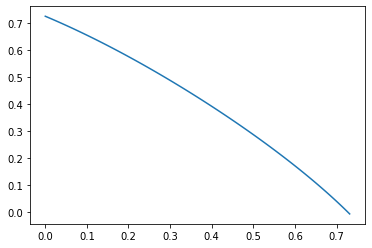

In [12]:
plt.plot(simple_contour(f,0.5,)[0],simple_contour(f,0.5,)[1])
plt.show()

#### Optimisation

Ainsi, on a une bonne approximation du point suivant qui respecte en partie les conditions de tracé.
En effet, on utilise une méthode inspirée de la méthode d'Euler pour les équations différentielles, qui peut présenter un fort phénomène de dérive.
Pour affiner le tracé précédent, on décide d'appliquer la méthode de Newton à une fonction $F$ de $\mathbf{R}^2$ dans $\mathbf{R}^2$ bien choisie:

In [10]:
def F(x, y, x0, y0, c, delta):
    return np.array([f(x,y) - c, (x-x0)**2 + (y-y0)**2 - delta**2])

On remplace alors la dérivée par la jacobienne:

In [7]:
def J_F(x, y):
    j = autograd.jacobian
    return np.c_[j(F, 0)(x, y), j(F, 1)(x, y)]